<a href="https://colab.research.google.com/github/Dani-Arizmendi/deepLearning/blob/master/AA_PRACTICA1_GRUPO_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GRUPO 3 
Daniel Arizmendi González 
Inés de la Peña Fajardo



**Introducción**

En este trabajo crearemos una red neuronal entrenada con imágenes de ropa de Zalando, cuyo fin es clasificar la imagen en función de la categoría a la que pertenece, existiendo 10 opciones. 
Creamos 8 modelos diferentes entre ellos con cambios como distinta función de activación, número de neuronas, épocas de entrenamiento u optimizador;
analizando los resultados y comentando las reflexiones.

# Importar y explorar el set de datos

In [15]:
# Importamos Keras
import keras
keras.__version__

'2.6.0'

Añadimos las librerías que vamos a usar

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

Cargamos el conjunto de datos fashion_mnist en Keras


In [17]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [18]:
train_images.shape

(60000, 28, 28)

In [19]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
test_images.shape

(10000, 28, 28)

In [21]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

La función keras.layers.Flatten() nos permite convertir un array de n dimensiones en otro  de 1 sola dimensión. Por ejemplo si tenemos un array (28,28) la función nos devuelve un vector 784. (28*28)


# Preparación de los datos de imagen

In [23]:
train_images = train_images / 255.0

test_images = test_images / 255.0

#Apartado 1, 2, 3 y 4 


## Modelo 1

In [24]:
# Creamos el modelo 1 y añadimos 3 capas 1 flatten y 2 dense con 10 neuronas ambas. Utilizando la función de optimización 'relu'

modelo1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])



In [25]:
# Compilamos el modelo con el optimizador 'sgd' y la función de pérdida 'sparse_categorical_crossentropy'
modelo1.compile(optimizer='sgd',
                loss='sparse_categorical_crossentropy' , 
                metrics=['accuracy'])



In [ ]:
# Entrenamos el modelo con las imágenes y etiquetas para ello
modelo1.fit(train_images, train_labels, epochs=5, batch_size=128)

# Epoch 1/5
#469/469 [==============================] - 1s 2ms/step - loss: 1.5657 - accuracy: 0.4850
#Epoch 2/5
#469/469 [==============================] - 1s 2ms/step - loss: 0.8711 - accuracy: 0.7306
#Epoch 3/5
#469/469 [==============================] - 1s 2ms/step - loss: 0.7132 - accuracy: 0.7663
#Epoch 4/5
#469/469 [==============================] - 1s 2ms/step - loss: 0.6441 - accuracy: 0.7879
#Epoch 5/5
#469/469 [==============================] - 1s 2ms/step - loss: 0.5997 - accuracy: 0.8019

In [ ]:
# Verificamos nuestro modelo con nuestro set de test
test_loss, test_acc = modelo1.evaluate(test_images, test_labels)

# 313/313 [==============================] - 0s 1ms/step - loss: 0.6098 - accuracy: 0.7918

In [ ]:
# Imprimimos el resultado

print('test_acc:', test_acc)
# test_acc: 0.7918000221252441

# El rendimiento del modelo es adecuado ya que no hay mucha diferencia entre el set de entrenamiento y el set de test

model.summary()

La salida  de la función model.summary() es un resumen que muestra cuantas capas tiene el modelo, en este caso el modelo tiene 1 capa flatten y 2 capas dense. Muestra también la forma de los datos de salida y el número de parámetros de cada capa. Por último muestra el número total de parámetros de todo el modelo. Los modelos 1, 2, 3 y 4 tendrán los mismos valores ya que tienen el mismo número de neuronas (10) en ambas capas; pasa lo mismo con los modelos del 5 al 8, que en este caso tienen 512 neuronas en la primera capa

In [ ]:
print(modelo1.summary())

#Model: "sequential_1"
#_________________________________________________________________
#Layer (type)                 Output Shape              Param #   
#=================================================================
#flatten_1 (Flatten)          (None, 784)               0         
#_________________________________________________________________
#dense_2 (Dense)              (None, 10)                7850      
#_________________________________________________________________
#dense_3 (Dense)              (None, 10)                110       
#=================================================================
#Total params: 7,960
#Trainable params: 7,960
#Non-trainable params: 0
#_________________________________________________________________
#None

plot_model()

También existe la función plot_model() que gráfica el modelo de la red neuronal y que nos ha ayudado a entender como funciona nuestra red neuronal con más claridad

In [ ]:
plot_model(modelo1, to_file='modelo1_plot.png', show_shapes=True)

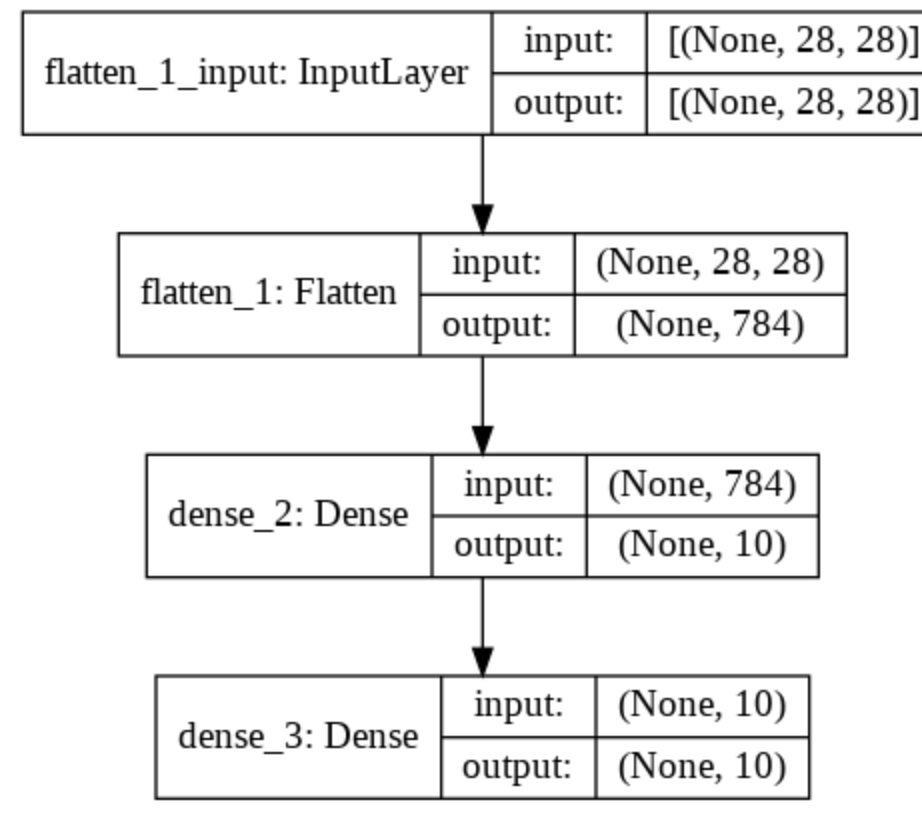

## Modelo 2

In [31]:
# 

modelo2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])



In [32]:
# En este caso la función de optimización es 'rmsprop'
modelo2.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy' , 
                metrics=['accuracy'])



In [ ]:
# 
modelo2.fit(train_images, train_labels, epochs=5, batch_size=128)

#Epoch 1/5
#469/469 [==============================] - 1s 2ms/step - loss: 0.8418 - accuracy: 0.7384
#Epoch 2/5
#469/469 [==============================] - 1s 2ms/step - loss: 0.5169 - accuracy: 0.8249
#Epoch 3/5
#469/469 [==============================] - 1s 2ms/step - loss: 0.4746 - accuracy: 0.8360
#Epoch 4/5
#469/469 [==============================] - 1s 2ms/step - loss: 0.4535 - accuracy: 0.8430
#Epoch 5/5
#469/469 [==============================] - 1s 2ms/step - loss: 0.4409 - accuracy: 0.8468

In [ ]:
# 
test_loss, test_acc = modelo2.evaluate(test_images, test_labels)

# 313/313 [==============================] - 0s 1ms/step - loss: 0.4709 - accuracy: 0.8360

In [ ]:
print('test_acc:', test_acc)

# test_acc: 0.8360000252723694

# El rendimiento del modelo es adecuado ya que no hay mucha diferencia entre el set de entrenamiento y el set de test

In [ ]:
print(modelo2.summary())

#Model: "sequential_2"
#_________________________________________________________________
#Layer (type)                 Output Shape              Param #   
#=================================================================
#flatten_2 (Flatten)          (None, 784)               0         
#_________________________________________________________________
#dense_4 (Dense)              (None, 10)                7850      
#_________________________________________________________________
#dense_5 (Dense)              (None, 10)                110       
#=================================================================
#Total params: 7,960
#Trainable params: 7,960
#Non-trainable params: 0
#_________________________________________________________________
#None

In [ ]:
plot_model(modelo2, to_file='modelo2_plot.png', show_shapes=True)

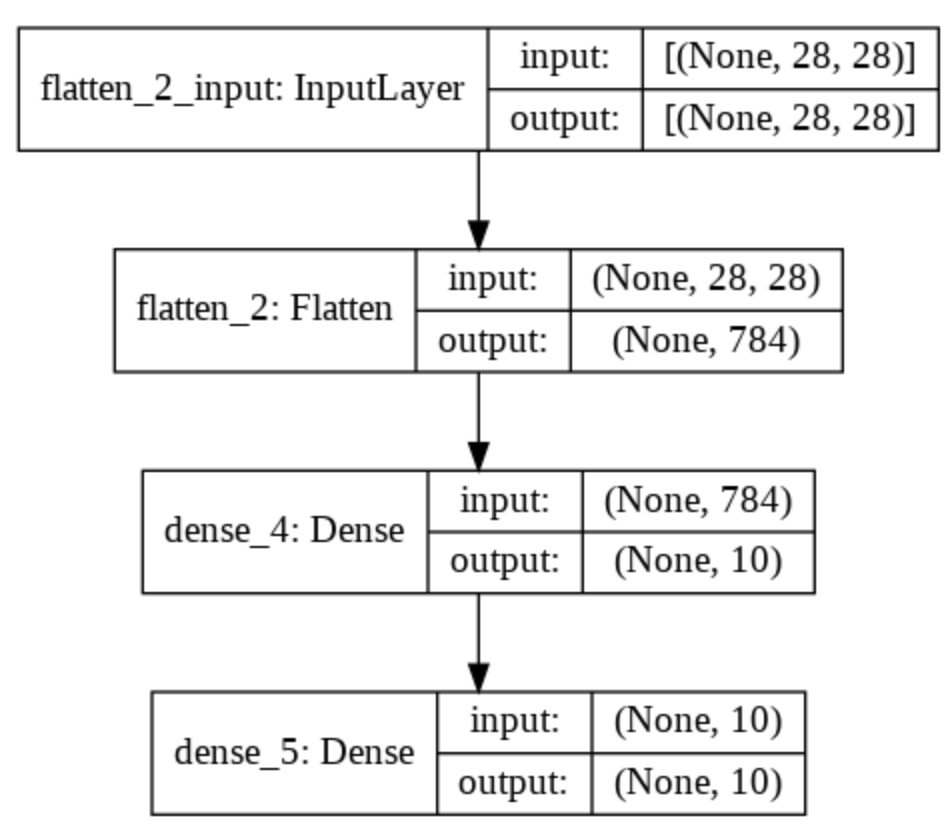

### Modelo 2 con 25 épocas (2b)

In [38]:
modelo2b = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [39]:
modelo2b.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy' , 
                metrics=['accuracy'])

In [ ]:
modelo2b.fit(train_images, train_labels, epochs=25, batch_size=128)

#Epoch 1/25
#469/469 [==============================] - 1s 2ms/step - loss: 0.8766 - accuracy: 0.7113
#Epoch 2/25
#469/469 [==============================] - 1s 2ms/step - loss: 0.5254 - accuracy: 0.8225
#Epoch 3/25
#469/469 [==============================] - 1s 2ms/step - loss: 0.4788 - accuracy: 0.8358
#Epoch 4/25
#469/469 [==============================] - 1s 2ms/step - loss: 0.4558 - accuracy: 0.8426
#Epoch 5/25
#469/469 [==============================] - 1s 2ms/step - loss: 0.4420 - accuracy: 0.8472
#Epoch 6/25
#469/469 [==============================] - 1s 2ms/step - loss: 0.4303 - accuracy: 0.8522
#Epoch 7/25
#469/469 [==============================] - 1s 2ms/step - loss: 0.4229 - accuracy: 0.8545
#Epoch 8/25
#469/469 [==============================] - 1s 2ms/step - loss: 0.4156 - accuracy: 0.8574
#Epoch 9/25
#469/469 [==============================] - 1s 2ms/step - loss: 0.4101 - accuracy: 0.8576
#Epoch 10/25
#469/469 [==============================] - 1s 2ms/step - loss: 0.4053 - accuracy: 0.8605
#Epoch 11/25
#469/469 [==============================] - 1s 2ms/step - loss: 0.4016 - accuracy: 0.8623
#Epoch 12/25
#469/469 [==============================] - 1s 2ms/step - loss: 0.3979 - accuracy: 0.8621
#Epoch 13/25
#469/469 [==============================] - 1s 2ms/step - loss: 0.3940 - accuracy: 0.8650
#Epoch 14/25
#469/469 [==============================] - 1s 2ms/step - loss: 0.3901 - accuracy: 0.8655
#Epoch 15/25
#469/469 [==============================] - 1s 2ms/step - loss: 0.3890 - accuracy: 0.8666
#Epoch 16/25
#469/469 [==============================] - 1s 2ms/step - loss: 0.3854 - accuracy: 0.8658
#Epoch 17/25
#469/469 [==============================] - 1s 2ms/step - loss: 0.3836 - accuracy: 0.8676
#Epoch 18/25
#469/469 [==============================] - 1s 2ms/step - loss: 0.3798 - accuracy: 0.8683
#Epoch 19/25
#469/469 [==============================] - 1s 2ms/step - loss: 0.3788 - accuracy: 0.8702
#Epoch 20/25
#469/469 [==============================] - 1s 2ms/step - loss: 0.3774 - accuracy: 0.8689
#Epoch 21/25
#469/469 [==============================] - 1s 2ms/step - loss: 0.3744 - accuracy: 0.8707
#Epoch 22/25
#469/469 [==============================] - 1s 2ms/step - loss: 0.3727 - accuracy: 0.8713
#Epoch 23/25
#469/469 [==============================] - 1s 2ms/step - loss: 0.3712 - accuracy: 0.8721
#Epoch 24/25
#469/469 [==============================] - 1s 2ms/step - loss: 0.3701 - accuracy: 0.8709
#Epoch 25/25
#469/469 [==============================] - 1s 2ms/step - loss: 0.3682 - accuracy: 0.8731

In [ ]:
test_loss, test_acc = modelo2b.evaluate(test_images, test_labels)

# 313/313 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.8446

In [ ]:
print('test_acc:', test_acc)

# test_acc: 0.8446000218391418

In [ ]:
print(modelo2b.summary())

#Model: "sequential_3"
#_________________________________________________________________
#Layer (type)                 Output Shape              Param #   
#=================================================================
#flatten_3 (Flatten)          (None, 784)               0         
#_________________________________________________________________
#dense_6 (Dense)              (None, 10)                7850      
#_________________________________________________________________
#dense_7 (Dense)              (None, 10)                110       
#=================================================================
#Total params: 7,960
#Trainable params: 7,960
#Non-trainable params: 0
#_________________________________________________________________
#None

In [ ]:
plot_model(modelo2b, to_file='modelo2b_plot.png', show_shapes=True)

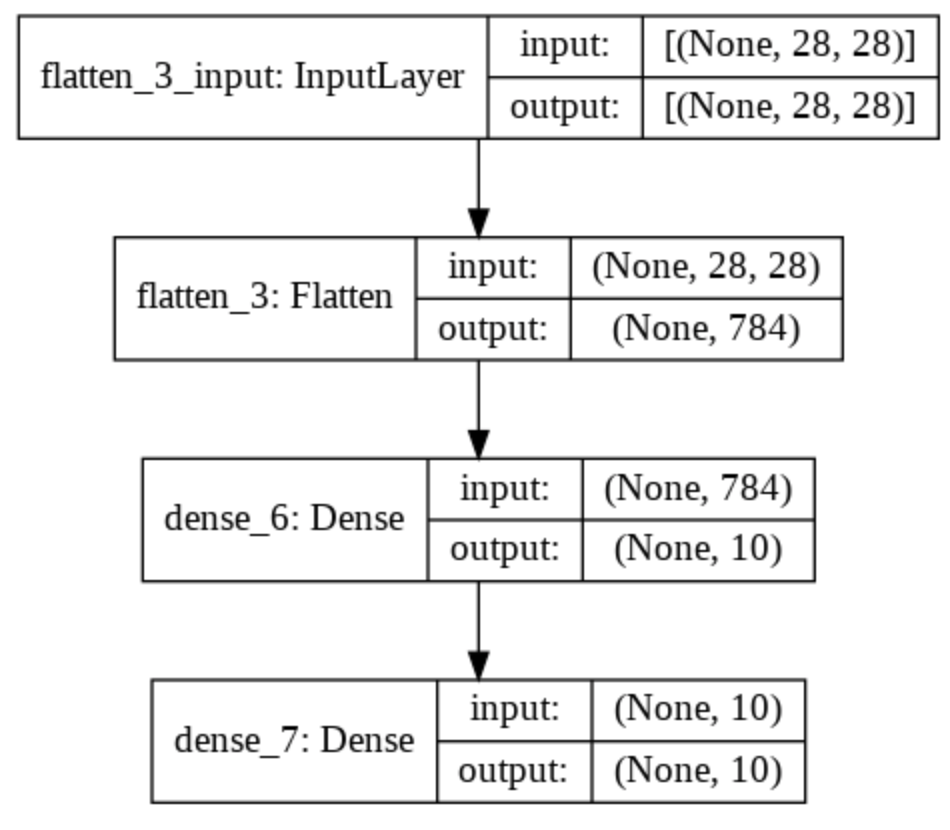

####Conclusiones
Como podemos observar, al aumentar el número de épocas aumenta la precisión del modelo. Observamos este fenómeno ya que con 5 épocas obtenemos una precisión de test de
83,6% mientras que al ejecutar 25 épocas obtenemos un 84,46% de precisión.
 Esto se debe a que al aumentar el número de épocas entrenamos más la red neuronal.

## Modelo 3


In [45]:
# En este modelo usamos la función de activación 'sigmoid'

modelo3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])



In [46]:
# 
modelo3.compile(optimizer='sgd',
                loss='sparse_categorical_crossentropy' , 
                metrics=['accuracy'])



In [ ]:
# 
modelo3.fit(train_images, train_labels, epochs=5, batch_size=128)

#Epoch 1/5
#469/469 [==============================] - 1s 2ms/step - loss: 2.1877 - accuracy: 0.3099
#Epoch 2/5
#469/469 [==============================] - 1s 2ms/step - loss: 1.9350 - accuracy: 0.5285
#Epoch 3/5
#469/469 [==============================] - 1s 2ms/step - loss: 1.7286 - accuracy: 0.6013
#Epoch 4/5
#469/469 [==============================] - 1s 2ms/step - loss: 1.5448 - accuracy: 0.6209
#Epoch 5/5
#469/469 [==============================] - 1s 2ms/step - loss: 1.3948 - accuracy: 0.6327

In [ ]:
# 
test_loss, test_acc = modelo3.evaluate(test_images, test_labels)

#313/313 [==============================] - 0s 1ms/step - loss: 1.3373 - accuracy: 0.6374

In [ ]:
print('test_acc:', test_acc)

# test_acc: 0.6373

In [ ]:
print(modelo3.summary())

#Model: "sequential_4"
#_________________________________________________________________
#Layer (type)                 Output Shape              Param #   
#=================================================================
#flatten_4 (Flatten)          (None, 784)               0         
#_________________________________________________________________
#dense_8 (Dense)              (None, 10)                7850      
#_________________________________________________________________
#dense_9 (Dense)              (None, 10)                110       
#=================================================================
#Total params: 7,960
#Trainable params: 7,960
#Non-trainable params: 0
#_________________________________________________________________
#None

In [ ]:
plot_model(modelo3, to_file='modelo3_plot.png', show_shapes=True)

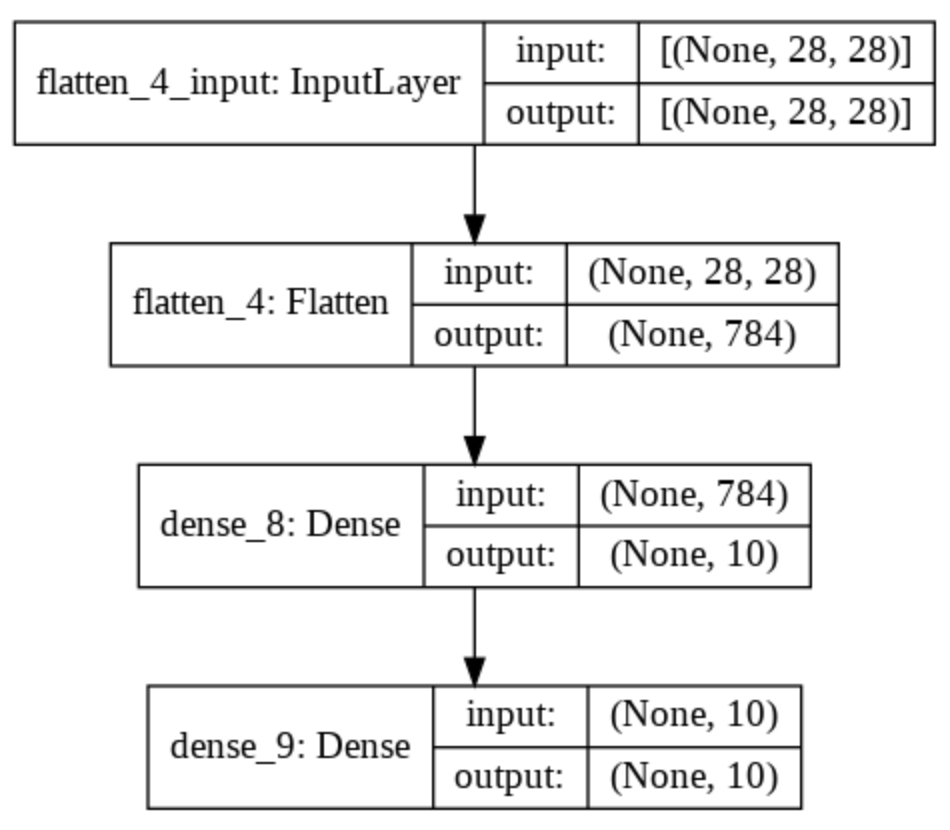

## Modelo 4

In [52]:
# 

modelo4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])



In [53]:
# 

modelo4.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy' , 
                metrics=['accuracy'])



In [ ]:
# 
modelo4.fit(train_images, train_labels, epochs=5, batch_size=128)

#Epoch 1/5
#469/469 [==============================] - 1s 2ms/step - loss: 1.4056 - accuracy: 0.6617
#Epoch 2/5
#469/469 [==============================] - 1s 2ms/step - loss: 0.8019 - accuracy: 0.7966
#Epoch 3/5
#469/469 [==============================] - 1s 2ms/step - loss: 0.6022 - accuracy: 0.8189
#Epoch 4/5
#469/469 [==============================] - 1s 2ms/step - loss: 0.5224 - accuracy: 0.8309
#Epoch 5/5
#469/469 [==============================] - 1s 2ms/step - loss: 0.4809 - accuracy: 0.8383

In [ ]:
# 
test_loss, test_acc = modelo4.evaluate(test_images, test_labels)

# 313/313 [==============================] - 0s 1ms/step - loss: 0.4943 - accuracy: 0.8312

In [56]:
print('test_acc:', test_acc)

# test_acc: 0.8312

test_acc: 0.8312000036239624


In [ ]:
print(modelo4.summary())

#Model: "sequential_5"
#_________________________________________________________________
#Layer (type)                 Output Shape              Param #   
#=================================================================
#flatten_5 (Flatten)          (None, 784)               0         
#_________________________________________________________________
#dense_10 (Dense)             (None, 10)                7850      
#_________________________________________________________________
#dense_11 (Dense)             (None, 10)                110       
#=================================================================
#Total params: 7,960
#Trainable params: 7,960
#Non-trainable params: 0
#_________________________________________________________________
#None

In [ ]:
plot_model(modelo4, to_file='modelo4_plot.png', show_shapes=True)

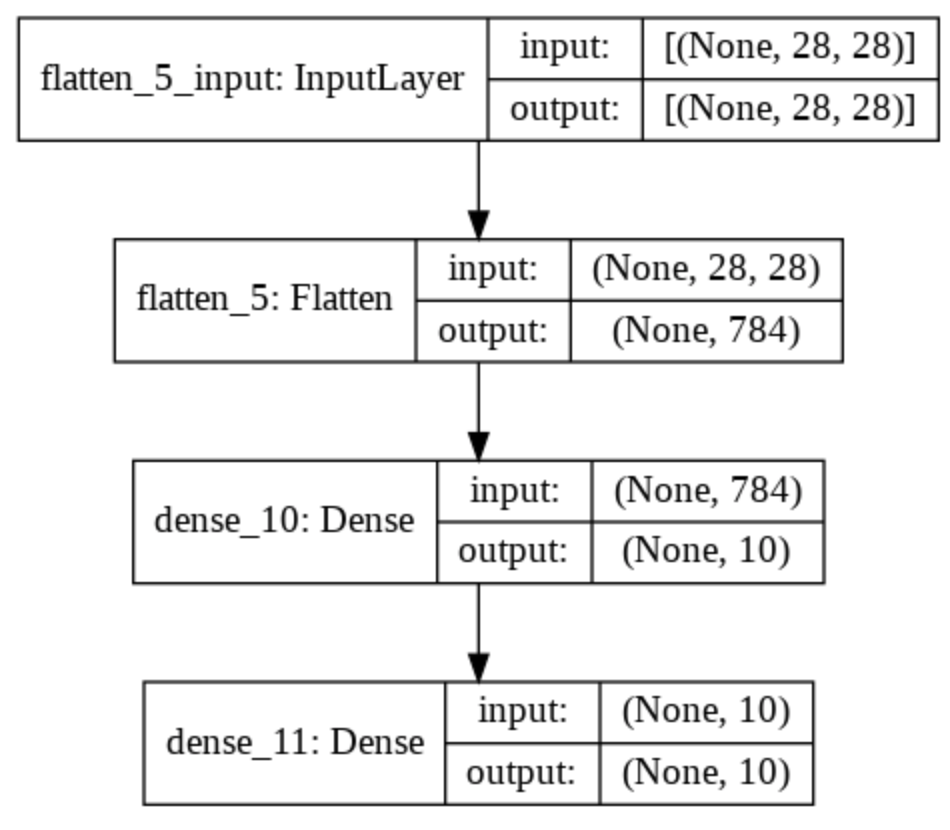

## Modelo 5

In [59]:
#  

modelo5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])



In [60]:
# 
modelo5.compile(optimizer='sgd',
                loss='sparse_categorical_crossentropy' , 
                metrics=['accuracy'])



In [ ]:
# 
modelo5.fit(train_images, train_labels, epochs=5, batch_size=128)

#Epoch 1/5
#469/469 [==============================] - 4s 7ms/step - loss: 1.0115 - accuracy: 0.6900
#Epoch 2/5
#469/469 [==============================] - 3s 7ms/step - loss: 0.6545 - accuracy: 0.7910
#Epoch 3/5
#469/469 [==============================] - 3s 7ms/step - loss: 0.5777 - accuracy: 0.8134
#Epoch 4/5
#469/469 [==============================] - 3s 7ms/step - loss: 0.5368 - accuracy: 0.8233
#Epoch 5/5
#469/469 [==============================] - 3s 7ms/step - loss: 0.5108 - accuracy: 0.8309

In [ ]:
# 
test_loss, test_acc = modelo5.evaluate(test_images, test_labels)

#313/313 [==============================] - 1s 2ms/step - loss: 0.5285 - accuracy: 0.8179

In [ ]:
print('test_acc:', test_acc)

# test_acc: 0.8179

In [ ]:
print(modelo5.summary())

#Model: "sequential_6"
#_________________________________________________________________
#Layer (type)                 Output Shape              Param #   
#=================================================================
#flatten_6 (Flatten)          (None, 784)               0         
#_________________________________________________________________
#dense_12 (Dense)             (None, 512)               401920    
#_________________________________________________________________
#dense_13 (Dense)             (None, 10)                5130      
#=================================================================
#Total params: 407,050
#Trainable params: 407,050
#Non-trainable params: 0
#_________________________________________________________________
#None

In [ ]:
plot_model(modelo5, to_file='modelo5_plot.png', show_shapes=True)

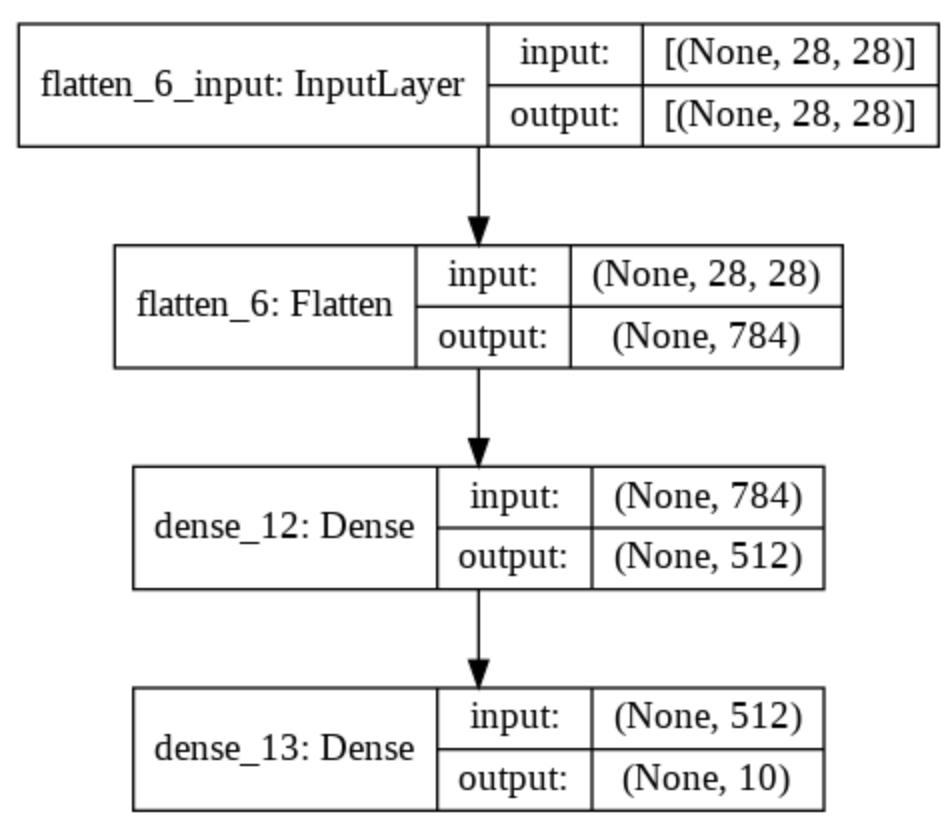

## Modelo 6

In [66]:
# 

modelo6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])



In [67]:
# 
modelo6.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy' , 
                metrics=['accuracy'])



In [ ]:
# 
modelo6.fit(train_images, train_labels, epochs=5, batch_size=128)

#Epoch 1/5
#469/469 [==============================] - 5s 10ms/step - loss: 0.5582 - accuracy: 0.8015
#Epoch 2/5
#469/469 [==============================] - 5s 10ms/step - loss: 0.3817 - accuracy: 0.8606
#Epoch 3/5
#469/469 [==============================] - 5s 10ms/step - loss: 0.3351 - accuracy: 0.8772
#Epoch 4/5
#469/469 [==============================] - 5s 10ms/step - loss: 0.3113 - accuracy: 0.8857
#Epoch 5/5
#469/469 [==============================] - 5s 10ms/step - loss: 0.2907 - accuracy: 0.8917

In [ ]:
# 
test_loss, test_acc = modelo6.evaluate(test_images, test_labels)

# 313/313 [==============================] - 1s 2ms/step - loss: 0.3506 - accuracy: 0.8790

In [ ]:
print('test_acc:', test_acc)

# test_acc: 0.8790

In [ ]:
print(modelo6.summary())

#Model: "sequential_7"
#_________________________________________________________________
#Layer (type)                 Output Shape              Param #   
#=================================================================
#flatten_7 (Flatten)          (None, 784)               0         
#_________________________________________________________________
#dense_14 (Dense)             (None, 512)               401920    
#_________________________________________________________________
#dense_15 (Dense)             (None, 10)                5130      
#=================================================================
#Total params: 407,050
#Trainable params: 407,050
#Non-trainable params: 0
#_________________________________________________________________
#None

In [ ]:
plot_model(modelo6, to_file='modelo6_plot.png', show_shapes=True)

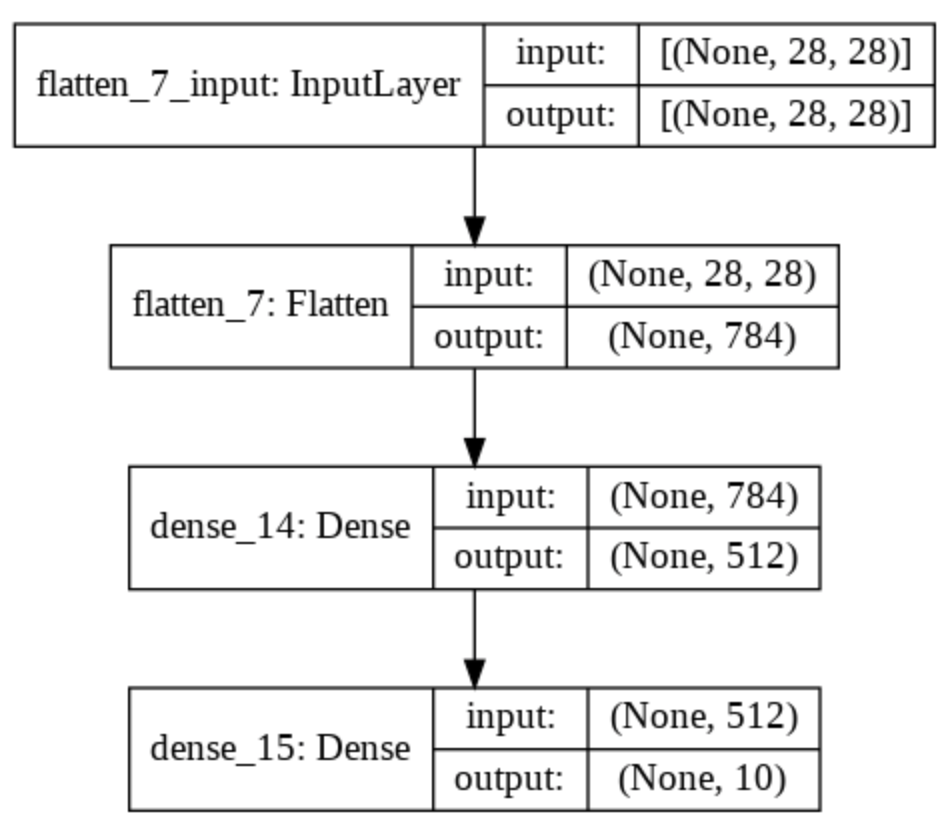

## Modelo 7

In [73]:
#  

modelo7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])



In [74]:
# 
modelo7.compile(optimizer='sgd',
                loss='sparse_categorical_crossentropy' , 
                metrics=['accuracy'])



In [ ]:
# 
modelo7.fit(train_images, train_labels, epochs=5, batch_size=128)

#Epoch 1/5
#469/469 [==============================] - 4s 7ms/step - loss: 1.6817 - accuracy: 0.5771
#Epoch 2/5
#469/469 [==============================] - 3s 7ms/step - loss: 1.1183 - accuracy: 0.7100
#Epoch 3/5
#469/469 [==============================] - 3s 7ms/step - loss: 0.9204 - accuracy: 0.7319
#Epoch 4/5
#469/469 [==============================] - 3s 7ms/step - loss: 0.8210 - accuracy: 0.7440
#Epoch 5/5
#469/469 [==============================] - 3s 7ms/step - loss: 0.7606 - accuracy: 0.7534

In [ ]:
# 
test_loss, test_acc = modelo7.evaluate(test_images, test_labels)
# 313/313 [==============================] - 1s 2ms/step - loss: 0.7503 - accuracy: 0.7506

In [ ]:
print('test_acc:', test_acc)

# test_acc: 0.7505

In [ ]:
print(modelo7.summary())

#Model: "sequential_8"
#_________________________________________________________________
#Layer (type)                 Output Shape              Param #   
#=================================================================
#flatten_8 (Flatten)          (None, 784)               0         
#_________________________________________________________________
#dense_16 (Dense)             (None, 512)               401920    
#_________________________________________________________________
#dense_17 (Dense)             (None, 10)                5130      
#=================================================================
#Total params: 407,050
#Trainable params: 407,050
#Non-trainable params: 0
#_________________________________________________________________
#None

In [ ]:
plot_model(modelo7, to_file='modelo7_plot.png', show_shapes=True)

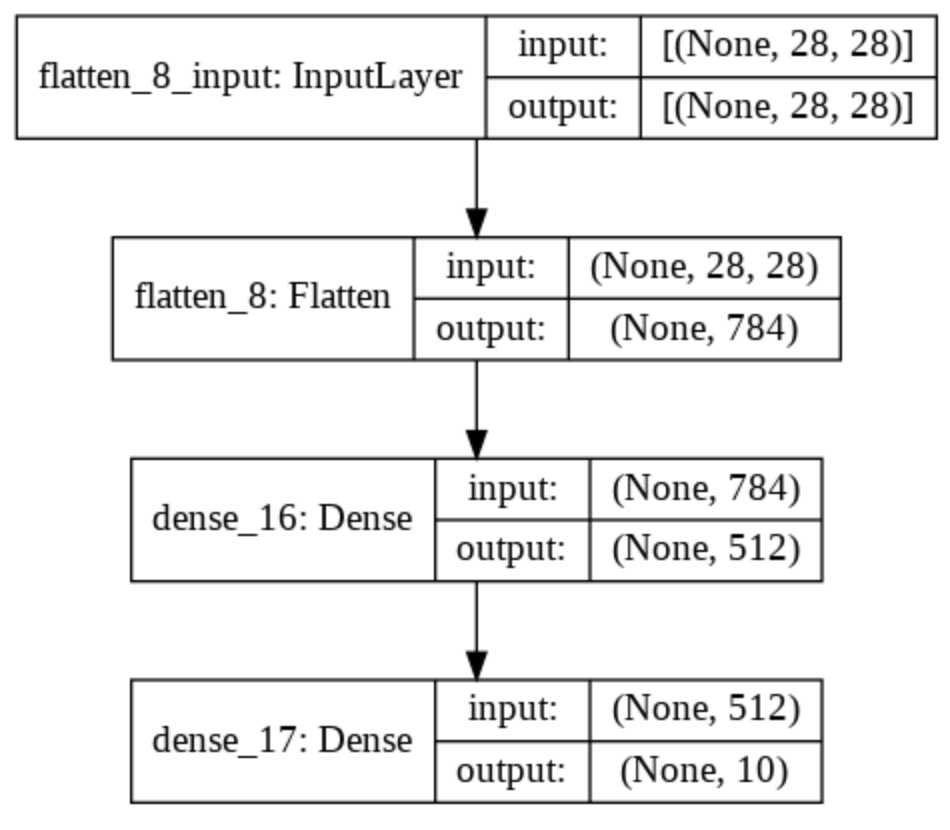

### Modelo 7 con 25 épocas (7b)



In [80]:
modelo7b = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])


In [81]:
modelo7b.compile(optimizer='sgd',
                loss='sparse_categorical_crossentropy' , 
                metrics=['accuracy'])

In [ ]:
modelo7b.fit(train_images, train_labels, epochs=25, batch_size=128)

#Epoch 1/25
#469/469 [==============================] - 4s 8ms/step - loss: 1.7178 - accuracy: 0.5710
#Epoch 2/25
#469/469 [==============================] - 4s 8ms/step - loss: 1.1348 - accuracy: 0.7105
#Epoch 3/25
#469/469 [==============================] - 4s 8ms/step - loss: 0.9269 - accuracy: 0.7293
#Epoch 4/25
#469/469 [==============================] - 3s 7ms/step - loss: 0.8236 - accuracy: 0.7426
#Epoch 5/25
#469/469 [==============================] - 4s 7ms/step - loss: 0.7617 - accuracy: 0.7521
#Epoch 6/25
#469/469 [==============================] - 4s 8ms/step - loss: 0.7197 - accuracy: 0.7602
#Epoch 7/25
#469/469 [==============================] - 4s 8ms/step - loss: 0.6886 - accuracy: 0.7673
#Epoch 8/25
#469/469 [==============================] - 4s 8ms/step - loss: 0.6642 - accuracy: 0.7725
#Epoch 9/25
#469/469 [==============================] - 4s 8ms/step - loss: 0.6443 - accuracy: 0.7786
#Epoch 10/25
#469/469 [==============================] - 4s 8ms/step - loss: 0.6272 - accuracy: 0.7835
#Epoch 11/25
#469/469 [==============================] - 3s 7ms/step - loss: 0.6128 - accuracy: 0.7889
#Epoch 12/25
#469/469 [==============================] - 4s 7ms/step - loss: 0.5999 - accuracy: 0.7923
#Epoch 13/25
#469/469 [==============================] - 3s 7ms/step - loss: 0.5888 - accuracy: 0.7971
#Epoch 14/25
#469/469 [==============================] - 3s 7ms/step - loss: 0.5787 - accuracy: 0.8001
#Epoch 15/25
#469/469 [==============================] - 4s 8ms/step - loss: 0.5697 - accuracy: 0.8038
#Epoch 16/25
#469/469 [==============================] - 4s 8ms/step - loss: 0.5614 - accuracy: 0.8058
#Epoch 17/25
#469/469 [==============================] - 4s 8ms/step - loss: 0.5538 - accuracy: 0.8088
#Epoch 18/25
#469/469 [==============================] - 4s 8ms/step - loss: 0.5470 - accuracy: 0.8105
#Epoch 19/25
#469/469 [==============================] - 4s 7ms/step - loss: 0.5409 - accuracy: 0.8120
#Epoch 20/25
#469/469 [==============================] - 4s 8ms/step - loss: 0.5349 - accuracy: 0.8141
#Epoch 21/25
#469/469 [==============================] - 4s 8ms/step - loss: 0.5296 - accuracy: 0.8163
#Epoch 22/25
#469/469 [==============================] - 4s 7ms/step - loss: 0.5248 - accuracy: 0.8173
#Epoch 23/25
#469/469 [==============================] - 4s 8ms/step - loss: 0.5201 - accuracy: 0.8197
#Epoch 24/25
#469/469 [==============================] - 3s 7ms/step - loss: 0.5157 - accuracy: 0.8207
#Epoch 25/25
#469/469 [==============================] - 4s 8ms/step - loss: 0.5117 - accuracy: 0.8228

In [ ]:
test_loss, test_acc = modelo7b.evaluate(test_images, test_labels)

# 313/313 [==============================] - 1s 2ms/step - loss: 0.5347 - accuracy: 0.8090

In [ ]:
print(modelo7b.summary())

#Model: "sequential_9"
#_________________________________________________________________
#Layer (type)                 Output Shape              Param #   
#=================================================================
#flatten_9 (Flatten)          (None, 784)               0         
#_________________________________________________________________
#dense_18 (Dense)             (None, 512)               401920    
#_________________________________________________________________
#dense_19 (Dense)             (None, 10)                5130      
#=================================================================
#Total params: 407,050
#Trainable params: 407,050
#Non-trainable params: 0
#_________________________________________________________________
#None

In [ ]:
plot_model(modelo7b, to_file='modelo7b_plot.png', show_shapes=True)

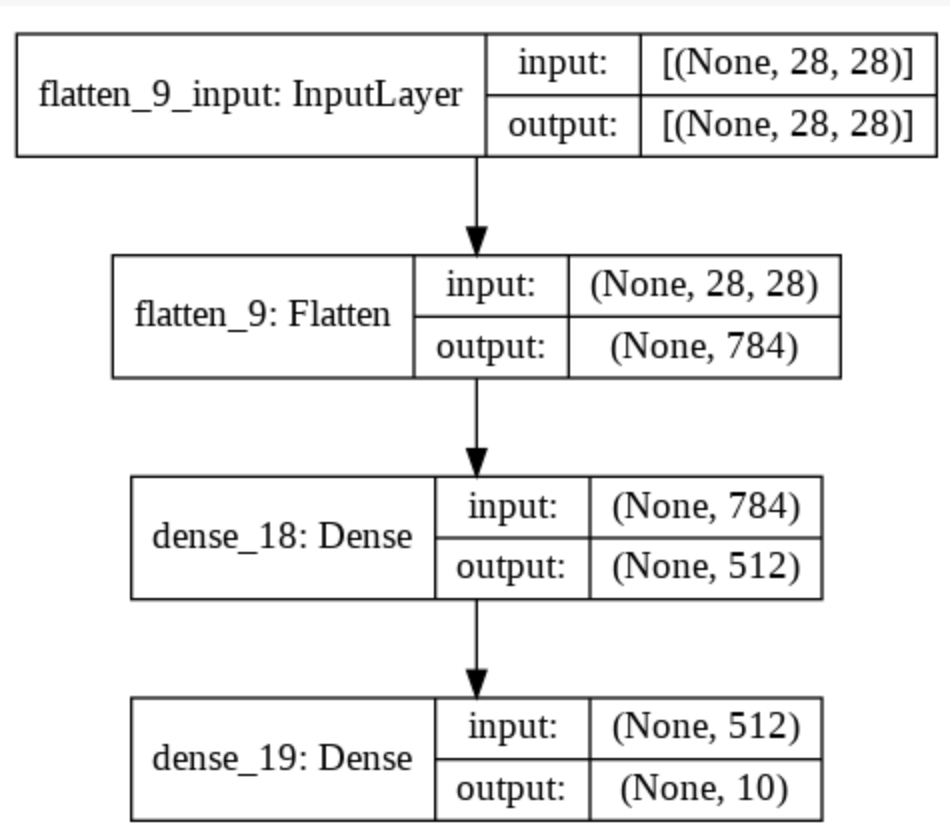

#### Conclusiones

Como podemos observar, al aumentar el número de épocas aumenta la precisión del modelo. Observamos este fenómeno ya que con 5 épocas obtenemos una precisión de test de 75,05% mientras que al ejecutar 25 épocas obtenemos un 80,90% de precisión. Esto se debe a que al aumentar el número de épocas entrenamos más la red neuronal.

## Modelo 8

In [86]:
#  

modelo8 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])



In [87]:
# 
modelo8.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy' , 
                metrics=['accuracy'])



In [ ]:
# 
modelo8.fit(train_images, train_labels, epochs=5, batch_size=128)

#Epoch 1/5
#469/469 [==============================] - 5s 10ms/step - loss: 0.5879 - accuracy: 0.7921
#Epoch 2/5
#469/469 [==============================] - 5s 10ms/step - loss: 0.4263 - accuracy: 0.8443
#Epoch 3/5
#469/469 [==============================] - 4s 9ms/step - loss: 0.3867 - accuracy: 0.8599
#Epoch 4/5
#469/469 [==============================] - 4s 10ms/step - loss: 0.3602 - accuracy: 0.8685
#Epoch 5/5
#469/469 [==============================] - 4s 10ms/step - loss: 0.3385 - accuracy: 0.8758

In [89]:
# 
test_loss, test_acc = modelo8.evaluate(test_images, test_labels)
# 313/313 [==============================] - 1s 3ms/step - loss: 0.3967 - accuracy: 0.8557

313/313 [==============================] - 1s 3ms/step - loss: 0.3967 - accuracy: 0.8557


In [90]:
print('test_acc:', test_acc)
# test_acc: 0.8557

test_acc: 0.8557000160217285


In [ ]:
print(modelo8.summary())

#Model: "sequential_10"
#_________________________________________________________________
#Layer (type)                 Output Shape              Param #   
#=================================================================
#flatten_10 (Flatten)         (None, 784)               0         
#_________________________________________________________________
#dense_20 (Dense)             (None, 512)               401920    
#_________________________________________________________________
#dense_21 (Dense)             (None, 10)                5130      
#=================================================================
#Total params: 407,050
#Trainable params: 407,050
#Non-trainable params: 0
#_________________________________________________________________
#None

In [ ]:
plot_model(modelo8, to_file='modelo8_plot.png', show_shapes=True)

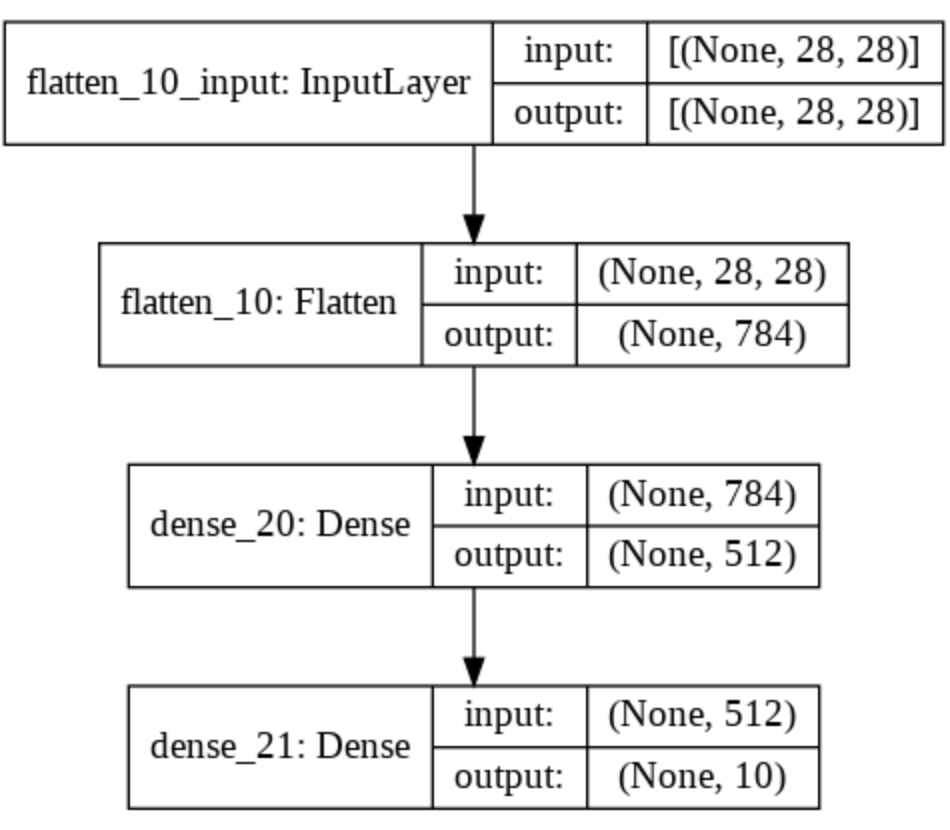

# Apartado 5   

 Primero comprobamos a que corresponde la 6º imagen de test




In [ ]:
tipo_de_prenda = test_labels[5]
class_names[tipo_de_prenda]

# 'Trouser'

Ahora usamos cada modelo para que nos muestre su predicción




### Modelo 1


In [137]:

predicciones1 = modelo1.predict(test_images)
prediccion_prenda = np.argmax(predicciones1[5])
class_names[prediccion_prenda]

# 'Trouser'

'Trouser'

#### Conclusiones Modelo 1
Como podemos observar el modelo predice que la sexta prenda es de tipo 'Trouser' . Este resultado tiene sentido puesto que el modelo 1 tiene una precisión del 79,18%

### Modelo 2

In [138]:
predicciones2 = modelo2.predict(test_images)
prediccion_prenda = np.argmax(predicciones2[5])
class_names[prediccion_prenda]

# 'Trouser'

'Trouser'

#### Conclusiones Modelo 2
El modelo predice que la sexta imagen pertenece al tipo 'Trouser'. Este resultado tiene sentido ya que nuestro modelo tiene una precisión del 83,6%

####Modelo 2b


In [139]:
predicciones2b= modelo2b.predict(test_images)
prediccion_prenda = np.argmax(predicciones2b[5])
class_names[prediccion_prenda]

# 'Trouser'

'Trouser'

#### Conclusiones Modelo 2b
Como podemos observar el modelo predice que la sexta prenda es de tipo 'Pantalones' y se ajusta a la realidad, ya que al haber hecho más épocas la precisión había aumentado hasta el 84,46%

### Modelo 3

In [140]:
predicciones3 = modelo3.predict(test_images)
prediccion_prenda = np.argmax(predicciones3[5])
class_names[prediccion_prenda]

# 'Trouser'

'Trouser'

#### Conclusiones Modelo 3
Como podemos observar el modelo predice que la sexta prenda es de tipo 'Pantalones' y se ajusta a la realidad, debido a la precisión del modelo que llega al 63,73%

###Modelo 4


In [141]:
predicciones4 = modelo4.predict(test_images)
prediccion_prenda = np.argmax(predicciones4[5])
class_names[prediccion_prenda]

# 'Trouser'

'Trouser'

#### Conclusiones modelo 4
Como podemos observar el modelo predice que la sexta prenda es de tipo 'Pantalones' y se ajusta a la realidad, debido a la precisión del modelo que llega al 83,12%

### Modelo 5


In [142]:
predicciones5 = modelo5.predict(test_images)
prediccion_prenda = np.argmax(predicciones5[5])
class_names[prediccion_prenda]

# 'Trouser'

'Trouser'

####Conclusiones modelo 5
Como podemos observar el modelo predice que la sexta prenda es de tipo 'Trouser'. Este resultado tiene sentido puesto que el modelo 5 tiene una precisión del 81,79%.

###Modelo 6

In [143]:
predicciones6 = modelo6.predict(test_images)
prediccion_prenda = np.argmax(predicciones6[5])
class_names[prediccion_prenda]

# 'Trouser'

'Trouser'

####Conclusiones modelo 6
Como podemos observar el modelo predice que la sexta prenda es de tipo 'Pantalones' y se ajusta a la realidad, debido a la precisión del modelo que llega al 87,9%

###Modelo 7

In [144]:
predicciones7 = modelo7.predict(test_images)
prediccion_prenda = np.argmax(predicciones7[5])
class_names[prediccion_prenda]

# 'Trouser'

'Trouser'

####Conclusiones del modelo 7
Como podemos observar el modelo predice que la sexta prenda es de tipo 'Pantalones' y se ajusta a la realidad, debido a la precisión del modelo que llega al 75,05%


#### Modelo 7b


In [145]:
predicciones7b = modelo7b.predict(test_images)
prediccion_prenda = np.argmax(predicciones7b[5])
class_names[prediccion_prenda]

# 'Trouser'

'Trouser'

####Conclusiones 7b

Como podemos observar el modelo predice que la sexta prenda es de tipo 'Pantalones' y se ajusta a la realidad, debido a la precisión del modelo que llega al 80,90%

###Modelo 8

In [146]:
predicciones8 = modelo8.predict(test_images)
prediccion_prenda = np.argmax(predicciones8[5])
class_names[prediccion_prenda]

# 'Trouser'

'Trouser'

####Conclusiones del modelo 8
Como podemos observar el modelo predice que la sexta prenda es de tipo 'Pantalones' y se ajusta a la realidad, debido a la precisión del modelo que llega al 85,57%

# Apartado 6. Graficar Modelos.


##Modelo 1

In [147]:
def plot_image(i, predicciones1, true_label, img):
  predicciones1, true_label, img = predicciones1, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predicciones1)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predicciones1),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predicciones1, true_label):
  predicciones1, true_label = predicciones1, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predicciones1, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predicciones1)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:

filas = 2
cols = 5
num_images = filas*cols
plt.figure(figsize=(2*2*cols, 2*filas))
for i in range(num_images):
  plt.subplot(filas, 2*cols, 2*i+1)
  plot_image(i, predicciones1[i], test_labels, test_images)
  plt.subplot(filas, 2*cols, 2*i+2)
  plot_value_array(i, predicciones1[i], test_labels)
plt.tight_layout()
plt.show()

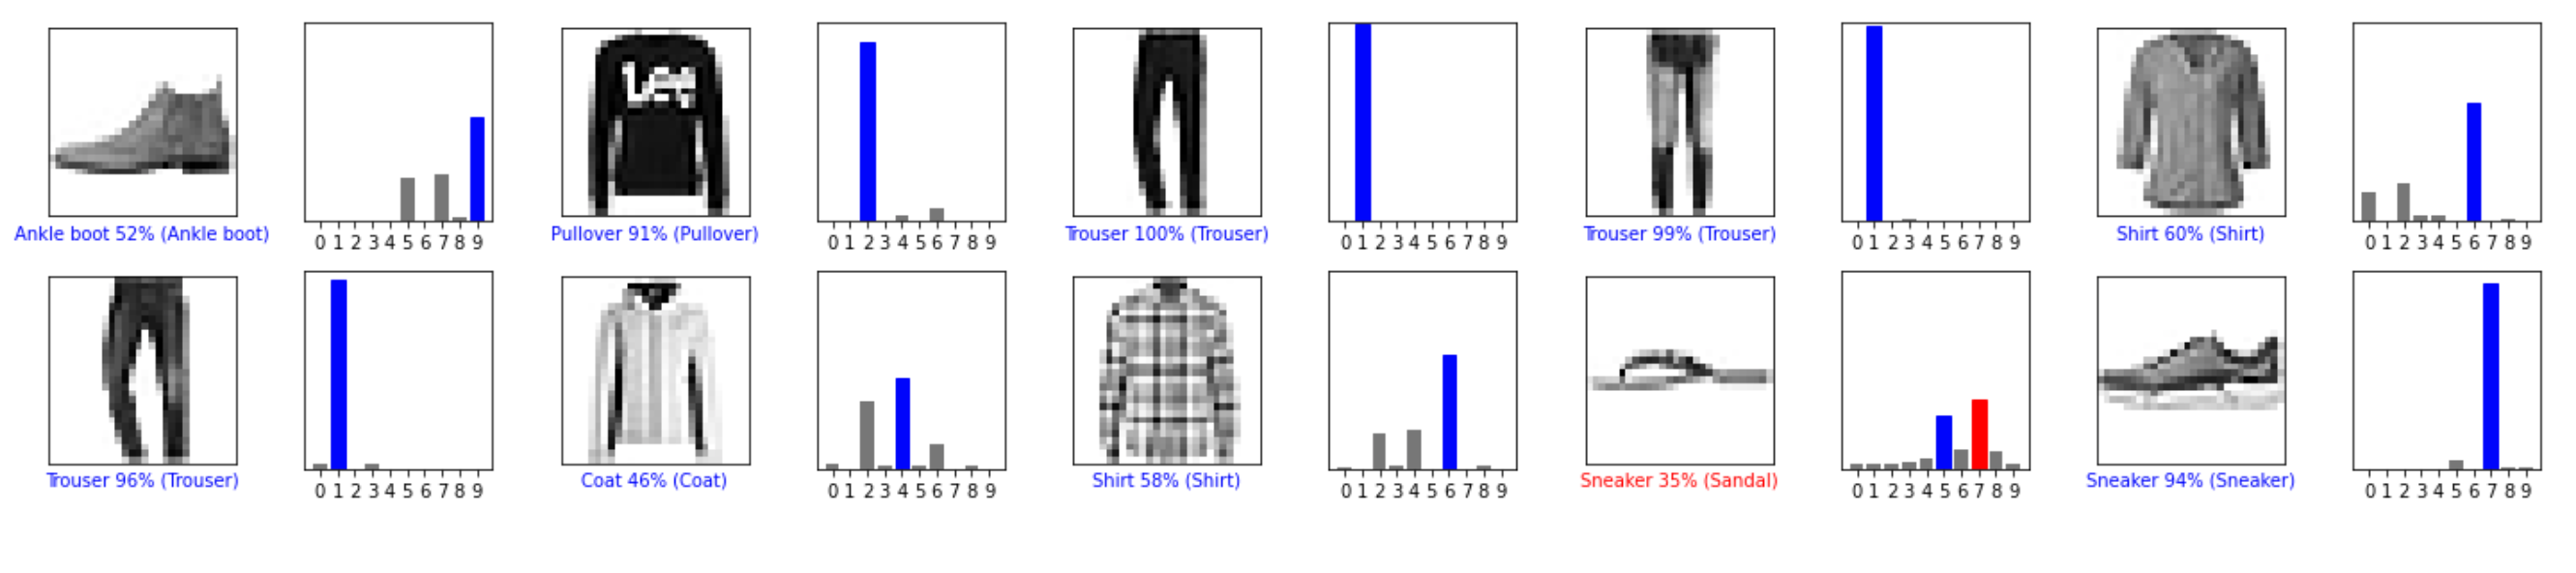

El modelo 1 tiene una precisión de 79,18%. En este caso entre las 10 primeras imágenes acierta 9 de 10 lo que resulta en una mejoría respecto al  resultado esperado, si analizasemos más imágenes la tendencia se acercaría hacia la precisión del modelo.

##Modelo 2

In [149]:
def plot_image(i, predicciones2, true_label, img):
  predicciones2, true_label, img = predicciones2, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predicciones2)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predicciones2),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predicciones2, true_label):
  predicciones2, true_label = predicciones2, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predicciones2, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predicciones2)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
filas = 2
cols = 5
num_images = filas*cols
plt.figure(figsize=(2*2*cols, 2*filas))
for i in range(num_images):
  plt.subplot(filas, 2*cols, 2*i+1)
  plot_image(i, predicciones2[i], test_labels, test_images)
  plt.subplot(filas, 2*cols, 2*i+2)
  plot_value_array(i, predicciones2[i], test_labels)
plt.tight_layout()
plt.show()

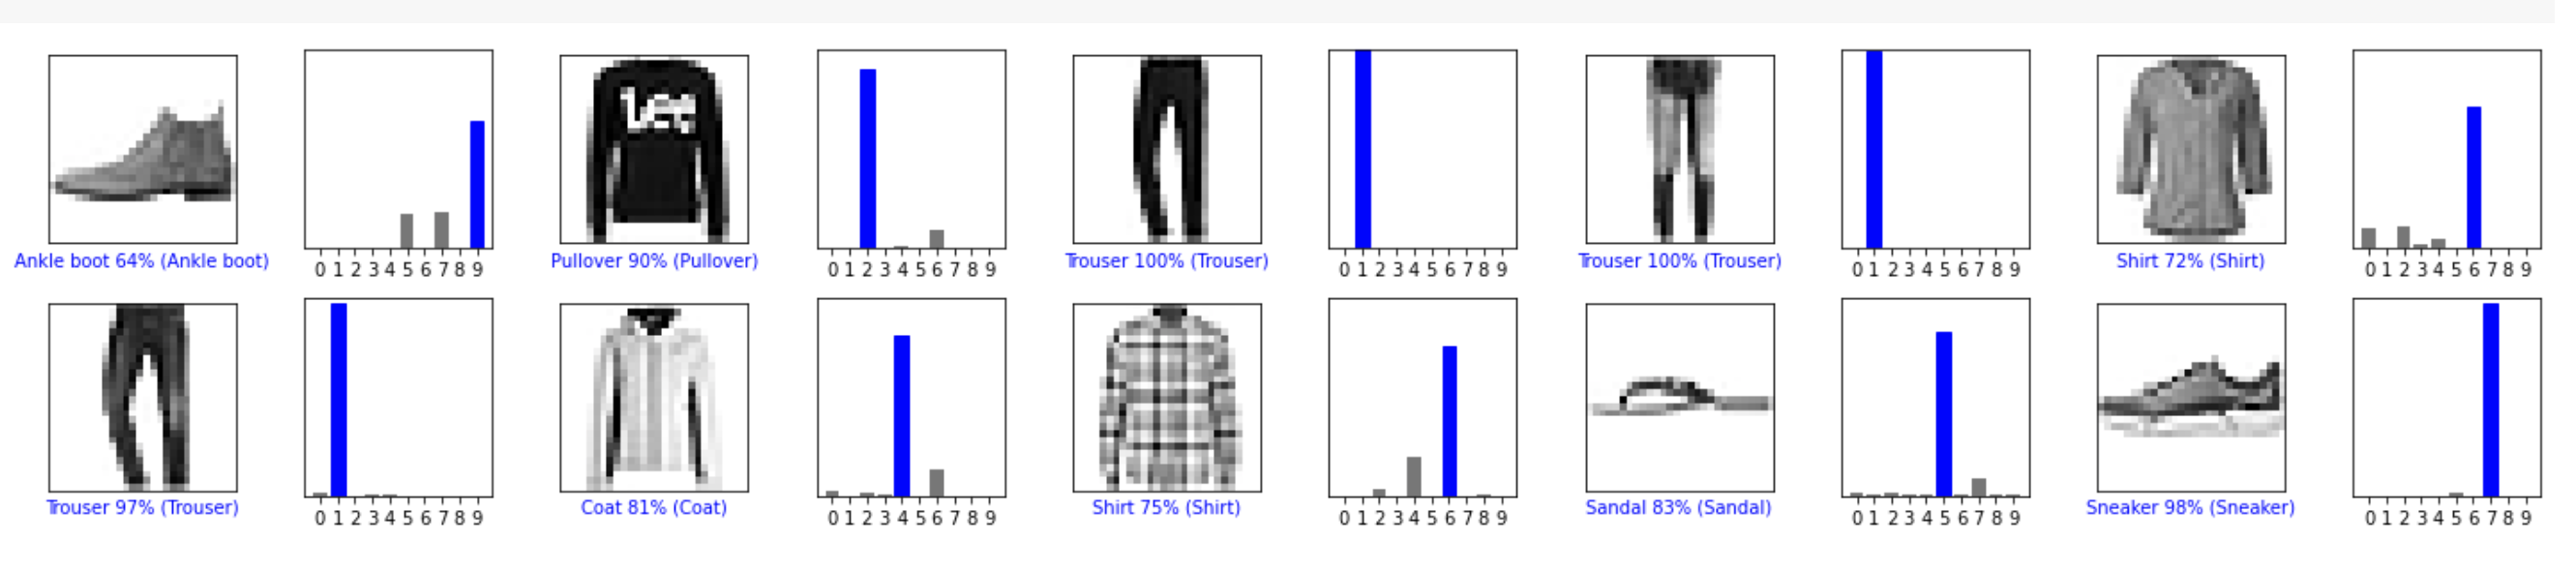

El modelo 2 tiene una precisión de 83,6% pero en este caso acierta las 10 primeras imágenes y con un porcentaje bastante alto por lo que podemos deducir que esta muestra no se adecua a la precisión del modelo.

##Modelo 3

In [151]:
def plot_image(i, predicciones3, true_label, img):
  predicciones3, true_label, img = predicciones3, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predicciones3)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predicciones3),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predicciones3, true_label):
  predicciones3, true_label = predicciones3, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predicciones3, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predicciones3)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
filas = 2
cols = 5
num_images = filas*cols
plt.figure(figsize=(2*2*cols, 2*filas))
for i in range(num_images):
  plt.subplot(filas, 2*cols, 2*i+1)
  plot_image(i, predicciones3[i], test_labels, test_images)
  plt.subplot(filas, 2*cols, 2*i+2)
  plot_value_array(i, predicciones3[i], test_labels)
plt.tight_layout()
plt.show()

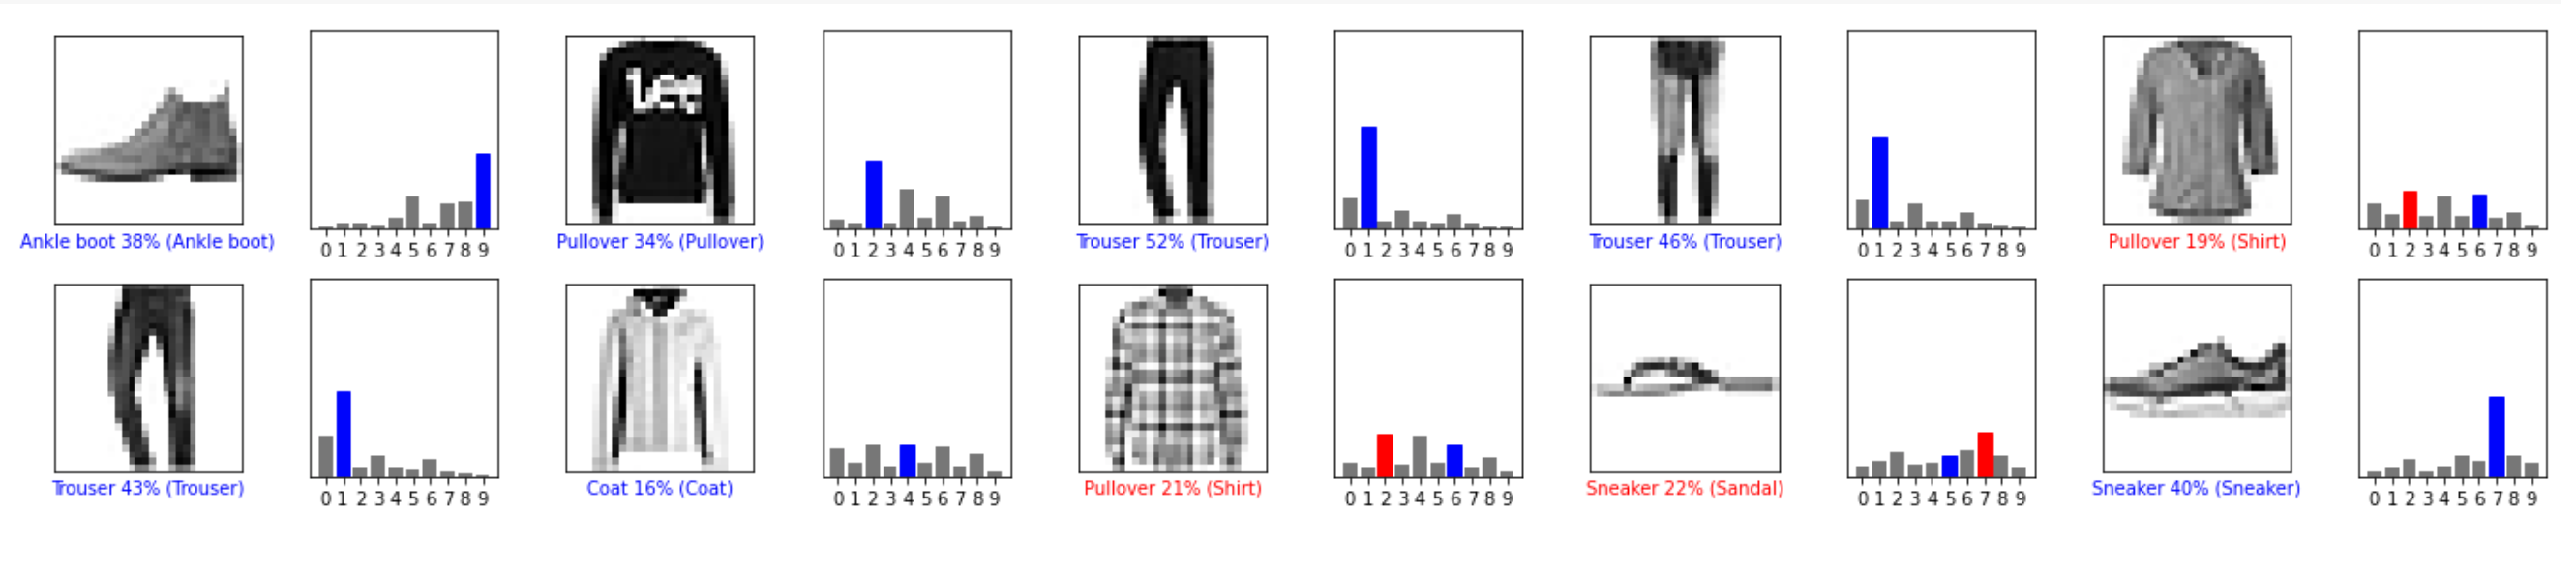

El modelo 3 tiene una precisión de 63,73% y la gráfica muestra como acierta en 7 de 10 casos aunque muchos de los aciertos son con porcentajes muy bajos lo que implica que no tiene mucha fiabilidad. 

## Modelo 4

In [153]:
def plot_image(i, predicciones4, true_label, img):
  predicciones4, true_label, img = predicciones4, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predicciones4)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predicciones4),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predicciones4, true_label):
  predicciones4, true_label = predicciones4, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predicciones4, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predicciones4)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
filas = 2
cols = 5
num_images = filas*cols
plt.figure(figsize=(2*2*cols, 2*filas))
for i in range(num_images):
  plt.subplot(filas, 2*cols, 2*i+1)
  plot_image(i, predicciones4[i], test_labels, test_images)
  plt.subplot(filas, 2*cols, 2*i+2)
  plot_value_array(i, predicciones4[i], test_labels)
plt.tight_layout()
plt.show()

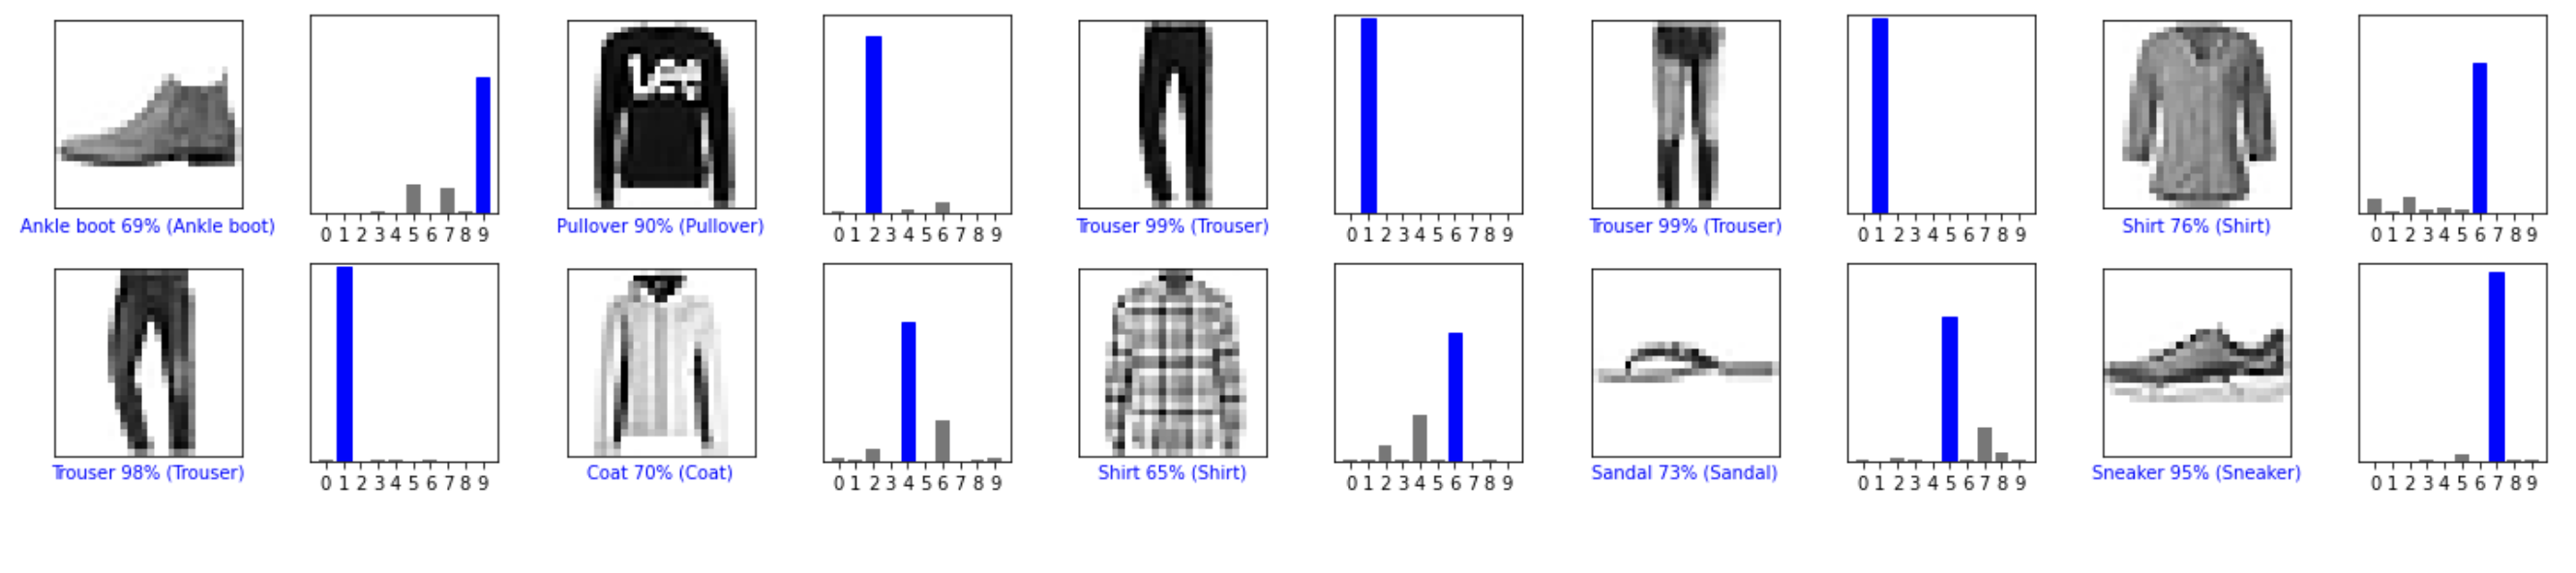

El modelo 4 tiene una precisión de 83,12% y en este caso acierta las 10 primeras imágenes además con una fiabilidad muy alta por lo que esta muestra no refleja la realidad de la precisión del modelo

##Modelo 5

In [155]:
def plot_image(i, predicciones5, true_label, img):
  predicciones5, true_label, img = predicciones5, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predicciones5)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predicciones5),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predicciones5, true_label):
  predicciones5, true_label = predicciones5, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predicciones5, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predicciones5)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
filas = 2
cols = 5
num_images = filas*cols
plt.figure(figsize=(2*2*cols, 2*filas))
for i in range(num_images):
  plt.subplot(filas, 2*cols, 2*i+1)
  plot_image(i, predicciones5[i], test_labels, test_images)
  plt.subplot(filas, 2*cols, 2*i+2)
  plot_value_array(i, predicciones5[i], test_labels)
plt.tight_layout()
plt.show()

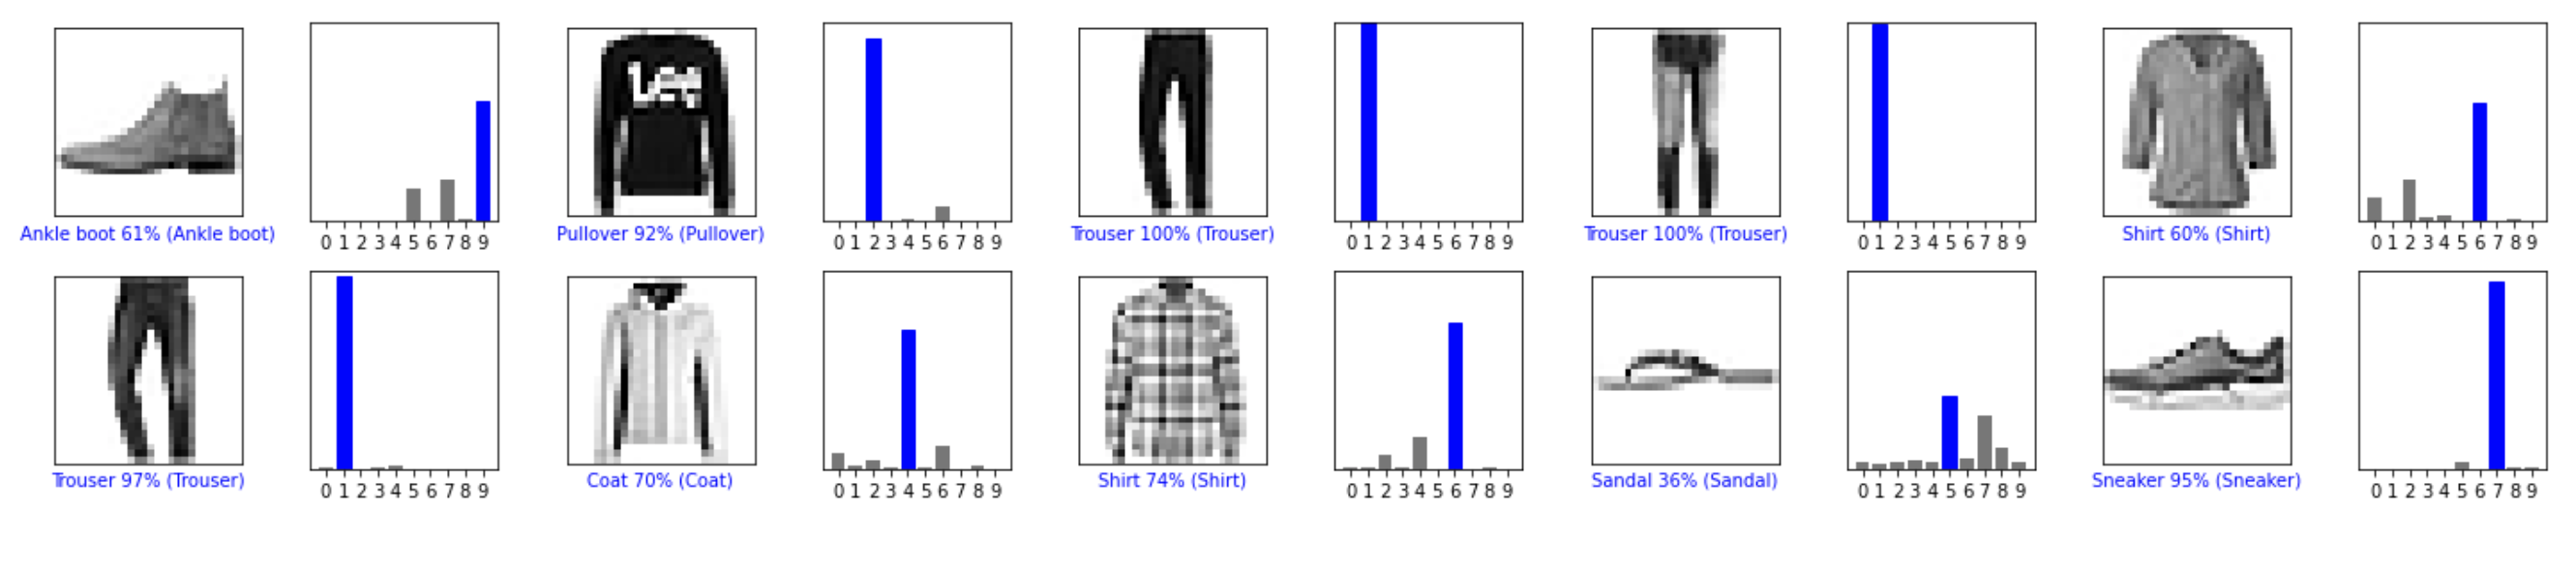

La precisión del modelo 5 es de 81,79%. La gráfica muestra como acierta las 10 primeras imágenes además con bastante fiabilidad.

##Modelo 6

In [157]:
def plot_image(i, predicciones6, true_label, img):
  predicciones6, true_label, img = predicciones6, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predicciones6)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predicciones6),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predicciones6, true_label):
  predicciones6, true_label = predicciones6, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predicciones6, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predicciones6)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
filas = 2
cols = 5
num_images = filas*cols
plt.figure(figsize=(2*2*cols, 2*filas))
for i in range(num_images):
  plt.subplot(filas, 2*cols, 2*i+1)
  plot_image(i, predicciones6[i], test_labels, test_images)
  plt.subplot(filas, 2*cols, 2*i+2)
  plot_value_array(i, predicciones6[i], test_labels)
plt.tight_layout()
plt.show()

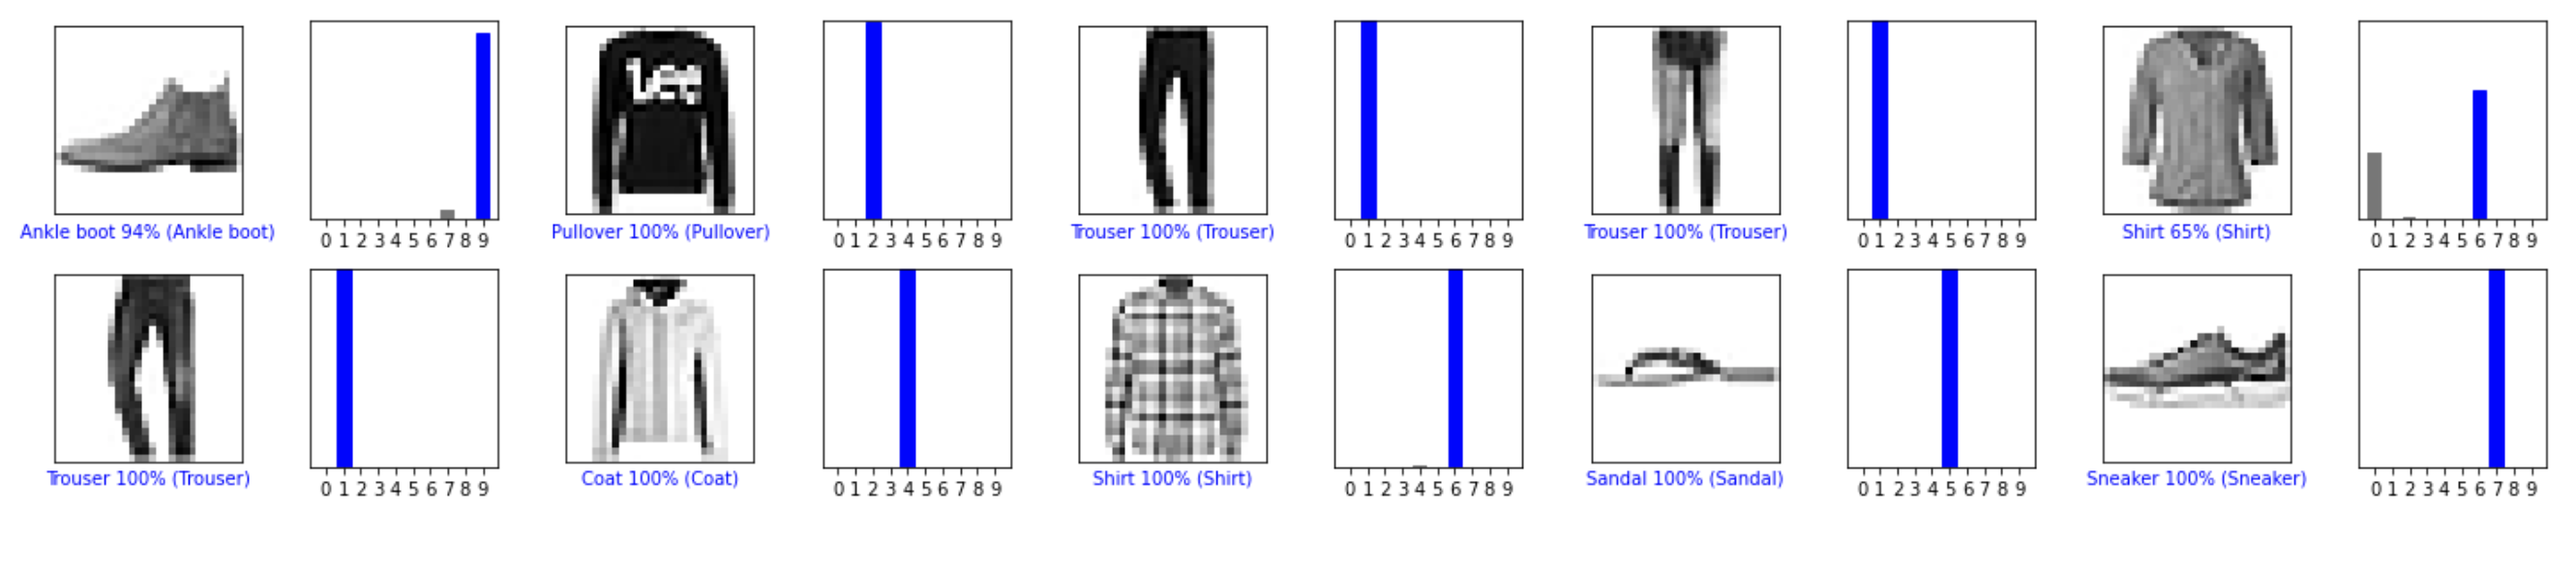

El modelo 6 tiene una precisión de 87,9%. La gráfica muestra como con las 10 primeras imágenes acierta las 10, además con una fiabilidad muy alta.    

##Modelo 7

In [159]:
def plot_image(i, predicciones7, true_label, img):
  predicciones7, true_label, img = predicciones7, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predicciones7)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predicciones7),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predicciones7, true_label):
  predicciones7, true_label = predicciones7, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predicciones7, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predicciones7)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
filas = 2
cols = 5
num_images = filas*cols
plt.figure(figsize=(2*2*cols, 2*filas))
for i in range(num_images):
  plt.subplot(filas, 2*cols, 2*i+1)
  plot_image(i, predicciones7[i], test_labels, test_images)
  plt.subplot(filas, 2*cols, 2*i+2)
  plot_value_array(i, predicciones7[i], test_labels)
plt.tight_layout()
plt.show()

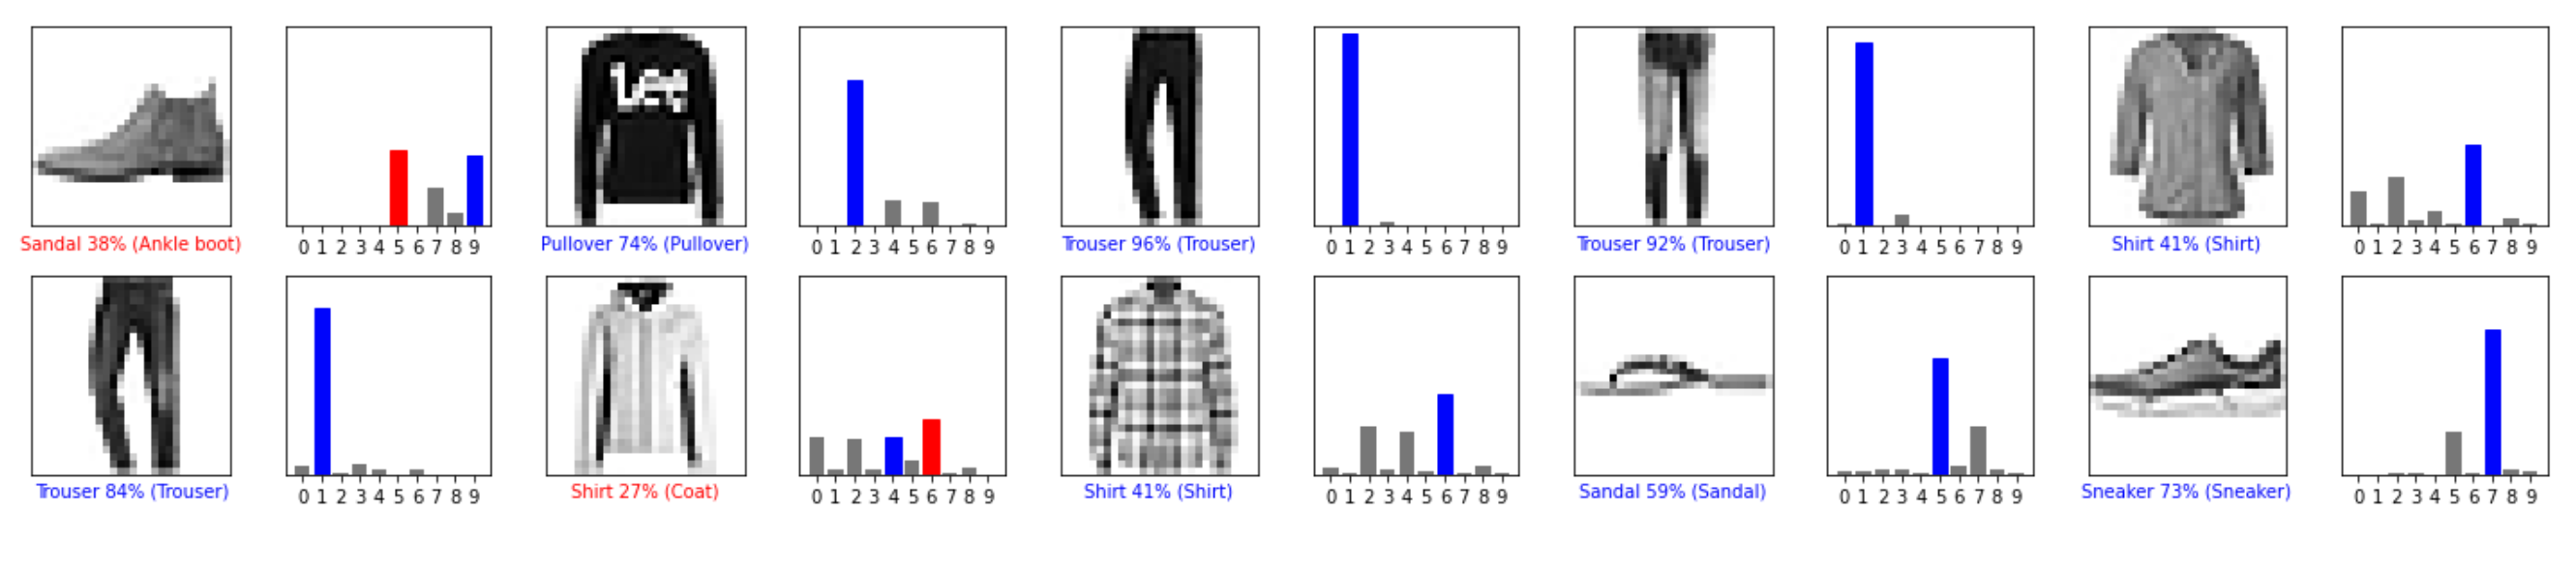

El modelo 7 tiene una precisión del 75,05%. La gráfica muestra como falla solamente en 2 imágenes lo cual refleja muy bien la fiabilidad del modelo

##Modelo 8

In [168]:
def plot_image(i, predicciones8, true_label, img):
  predicciones7, true_label, img = predicciones8, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predicciones7)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predicciones7),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predicciones8, true_label):
  predicciones8, true_label = predicciones8, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predicciones8, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predicciones8)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

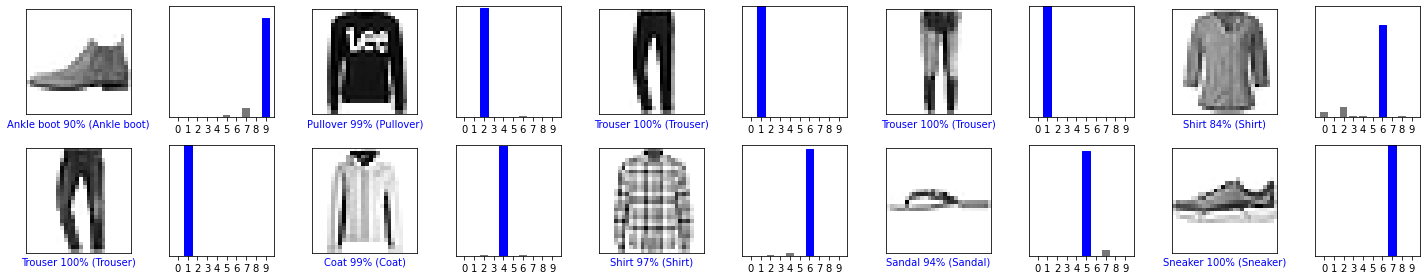

In [169]:
filas = 2
cols = 5
num_images = filas*cols
plt.figure(figsize=(2*2*cols, 2*filas))
for i in range(num_images):
  plt.subplot(filas, 2*cols, 2*i+1)
  plot_image(i, predicciones8[i], test_labels, test_images)
  plt.subplot(filas, 2*cols, 2*i+2)
  plot_value_array(i, predicciones8[i], test_labels)
plt.tight_layout()
plt.show()

El modelo 8 tiene una precisión de 85,56%. La gráfica muestra como acierta las 10 imágenes con una fiabilidad muy alta

# Apartado 7 

In [163]:


modelo3b = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])



In [164]:
# 
modelo3b.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy' , 
                metrics=['accuracy'])



In [ ]:
# 
modelo3b.fit(train_images, train_labels, epochs=5, batch_size=128)

#Epoch 1/5
#469/469 [==============================] - 1s 2ms/step - loss: 1.4451 - accuracy: 0.6034
#Epoch 2/5
#469/469 [==============================] - 1s 2ms/step - loss: 0.9002 - accuracy: 0.7539
#Epoch 3/5
#469/469 [==============================] - 1s 2ms/step - loss: 0.6965 - accuracy: 0.8047
#Epoch 4/5
#469/469 [==============================] - 1s 2ms/step - loss: 0.5837 - accuracy: 0.8252
#Epoch 5/5
#469/469 [==============================] - 1s 2ms/step - loss: 0.5230 - accuracy: 0.8353

In [ ]:
# 
test_loss, test_acc = modelo3b.evaluate(test_images, test_labels)

# 313/313 [==============================] - 0s 1ms/step - loss: 0.5294 - accuracy: 0.8286

In [ ]:
print('test_acc:', test_acc)

# test_acc: 0.8285

Conclusiones y marco teórico

El objetivo del entrenamiento de redes neuronales es minizar la función de coste encontrando los pesos adecuados. El optimizador es el encargado de generar pesos cada vez mejores, funciona calculando el gradiente de la función de coste  por cada peso de la red. El optimizador Adam combina los optimizadores AdaGrad y RMSProp. En vez de considerar un valor uniforme para todos los pesos, mantiene un factor de entrenamiento específico para calcular cada uno de ellos. Calculando el escalonado del factor de entrenamiento dividiendolo por la media del declive exponencial    del cuadrado de los gradientes viéndose afectado el cálculo por la media del momentum del gradiente.

La función de pérdida evalúa la desviación entre las predicciones realizadas por la red neuronal y los valores reales de las observaciones utilizadas durante el aprendizaje. Cuanto menor es este resultado, más eficiente es la red. La minimización de este resultado, se hace ajustando los distintos pesos de la red neuronal.

La diferencia entre 'categorical_crossentropy' y 'sparse_categorical_crossentropy' es que el primero tiene  en cuenta todos los valores del array de entrada mientras que el segundo solo  tiene en cuenta el que tenga mayor probabilidad de éxito. Lo que implica que omite un montón de información siendo menos eficiente que la primera, con la única ventaja de ahorra espacio.



# Procedimiento de la práctica

Para la realización de esta entrega hemos procedido de la siguiente manera. 
En primer lugar nos leímos la práctica cada uno por su cuenta, para ir informados a la primera reunión conjunta en la que hicimos un modelo en cada uno de los apartados.
La segunda parte fue trabajo individual, puesto que entre los dos ampliamos los apartados con el resto de modelos.
Por último, redactamos juntos la parte teórica y comentamos los resultados y el código.
Antes de entregar releímos la práctica para garantizar que no había ninguna errata.